In [ ]:
import cv2
from PIL import Image
import numpy as np
from google.colab.patches import cv2_imshow
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import zipfile
path = "/content/drive/MyDrive/Data science/Computer Vision Masterclass/Datasets/yalefaces.zip"
zip_object = zipfile.ZipFile(file = path, mode = "r")
zip_object.extractall("./")      # to extract all the file 
zip_object.close()         # to relase the memory 

#after running this code refresh the drive

In [ ]:
import os
print(os.listdir("/content/yalefaces/train"))


['subject09.leftlight.gif', 'subject08.noglasses.gif', 'subject08.sad.gif', 'subject09.happy.gif', 'subject08.centerlight.gif', 'subject10.wink.gif', 'subject02.glasses.gif', 'subject09.noglasses.gif', 'subject07.surprised.gif', 'subject09.centerlight.gif', 'subject14.surprised.gif', 'subject05.glasses.gif', 'subject05.happy.gif', 'subject08.wink.gif', 'subject12.surprised.gif', 'subject01.glasses.gif', 'subject05.normal.gif', 'subject11.surprised.gif', 'subject14.noglasses.gif', 'subject13.centerlight.gif', 'subject03.wink.gif', 'subject13.happy.gif', 'subject13.noglasses.gif', 'subject13.leftlight.gif', 'subject15.glasses.gif', 'subject01.sleepy.gif', 'subject01.sad.gif', 'subject14.glasses.gif', 'subject09.surprised.gif', 'subject05.noglasses.gif', 'subject03.happy.gif', 'subject03.centerlight.gif', 'subject02.happy.gif', 'subject11.noglasses.gif', 'subject08.glasses.gif', 'subject06.noglasses.gif', 'subject03.sad.gif', 'subject12.noglasses.gif', 'subject01.leftlight.gif', 'subject1

In [ ]:
len(os.listdir("/content/yalefaces/train"))

135

In [ ]:
def get_image_data():
  paths = [os.path.join("/content/yalefaces/train", f)  for f in os.listdir("/content/yalefaces/train")]  # it creates a complete path for each image
  # print(paths)
  faces = []
  ids = []
  for path in paths:
     #print(path)
     image = Image.open(path).convert("L")
     # it gives a PIL type of image but for opencv it needs to be coverted into an array
     image_np = np.array(image, "uint8")
     #print(type(image_np))
     id = int(os.path.split(path)[1].split(".")[0].split("t")[1])
     #print(id)
     
     ids.append(id)
     faces.append(image_np)
  return np.array(ids), faces

In [ ]:
ids, faces = get_image_data()

In [ ]:
ids

array([ 9,  8,  8,  9,  8, 10,  2,  9,  7,  9, 14,  5,  5,  8, 12,  1,  5,
       11, 14, 13,  3, 13, 13, 13, 15,  1,  1, 14,  9,  5,  3,  3,  2, 11,
        8,  6,  3, 12,  1, 15,  5, 10, 14, 14,  6, 15, 11,  4,  5, 11,  2,
        2,  4,  7, 10, 10, 12,  4, 15,  4,  4,  9, 11,  7, 10,  6, 13, 11,
        6,  4, 13, 11,  8, 14, 14, 12, 11,  2, 12,  9, 12, 14, 15,  5,  8,
       15, 12, 15,  6,  4, 13,  1,  1, 10,  7,  5, 15,  7,  1,  7, 10, 12,
        4,  7,  1,  8,  6,  6,  6,  7, 10,  3,  2, 13,  8,  4,  5,  2, 10,
        3,  9,  2,  2, 11,  3,  3,  3,  9, 12,  6,  1, 15, 14, 13,  7])

In [ ]:
len(ids)

135

In [ ]:
faces = np.array(faces)
faces.shape

(135, 243, 320)

In [ ]:
lbph_classifier = cv2.face.LBPHFaceRecognizer_create()
lbph_classifier.train(faces, ids)
lbph_classifier.write("lbph.yml")    #yml is the default format to save this classifier

In [ ]:
lbph_face_classifier = cv2.face.LBPHFaceRecognizer_create()
lbph_face_classifier.read("/content/lbph.yml")

In [ ]:
test_image = "/content/yalefaces/test/subject10.sad.gif"
image = Image.open(test_image).convert("L")
image_np = np.array(image, "uint8")

In [ ]:
image_np.shape

(243, 320)

In [ ]:
prediction = lbph_classifier.predict(image_np)
prediction

(10, 6.384336446373091)

the first no in tuple is the class while the second one is the confidence value

In [ ]:
expected_output = int(os.path.split(test_image)[1].split(".")[0].split("t")[1])
expected_output == prediction[0]

True

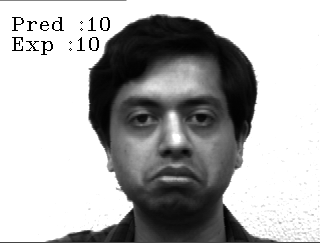

In [ ]:
cv2.putText(image_np, "Pred :" + str(prediction[0]), (10, 30), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0, 0, 0))
cv2.putText(image_np, "Exp :" + str(expected_output), (10, 50), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0, 0, 0))
cv2_imshow(image_np)

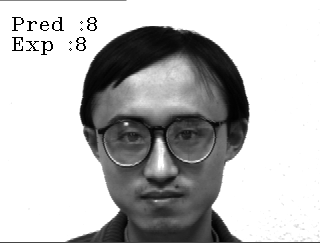

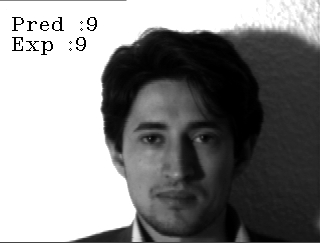

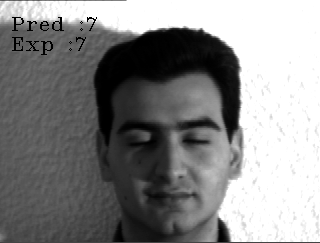

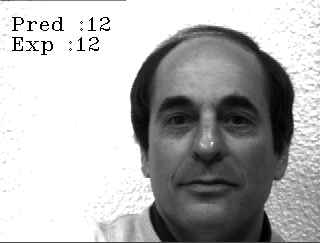

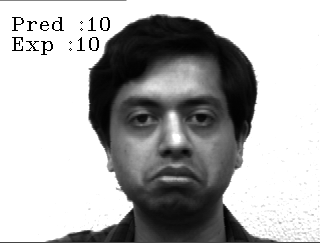

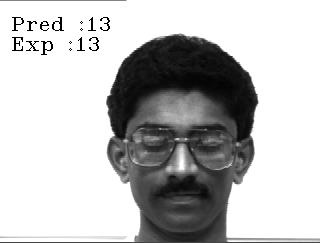

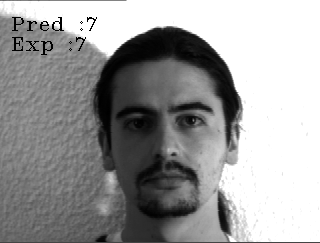

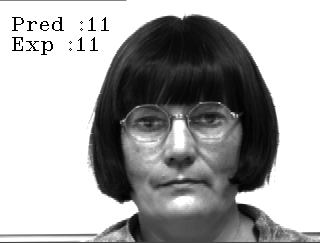

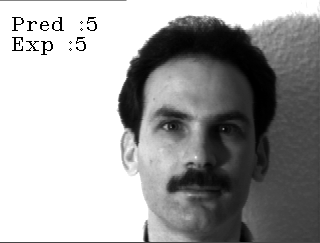

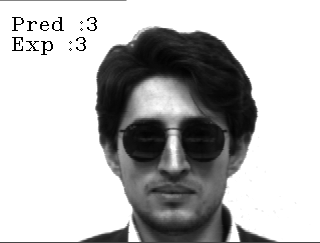

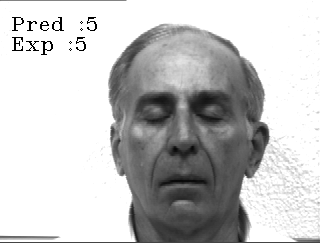

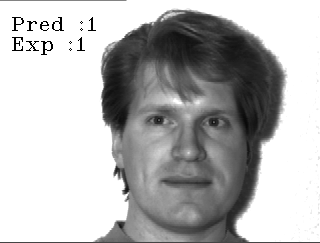

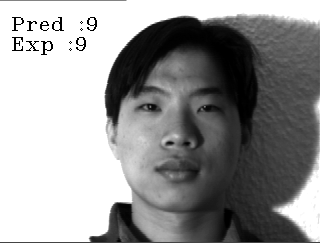

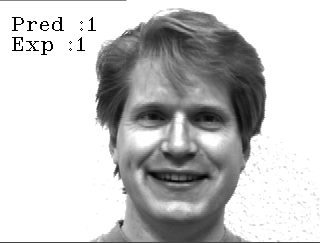

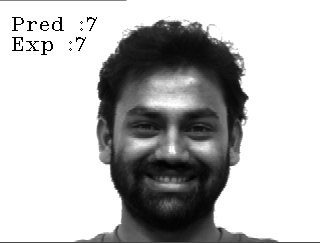

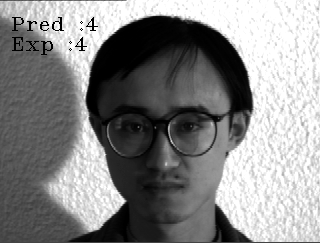

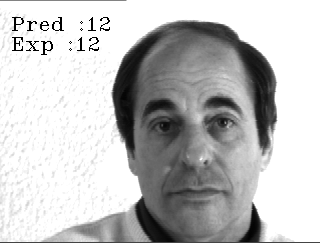

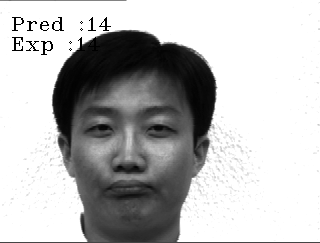

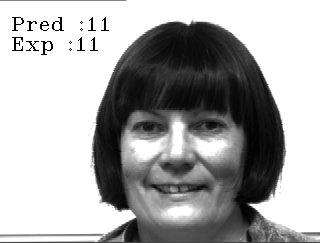

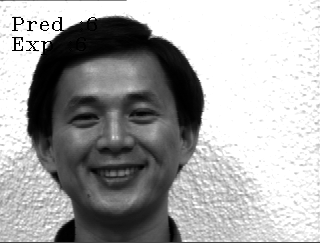

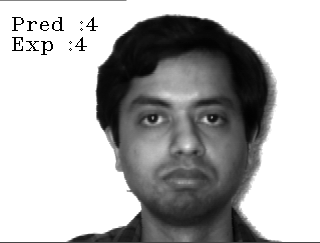

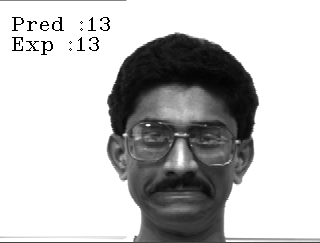

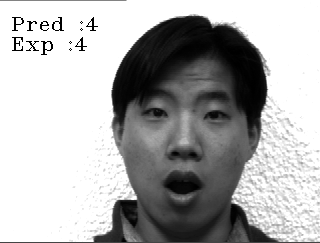

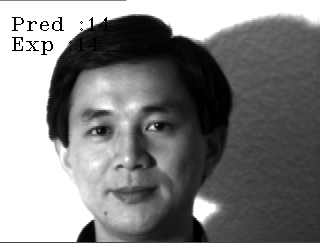

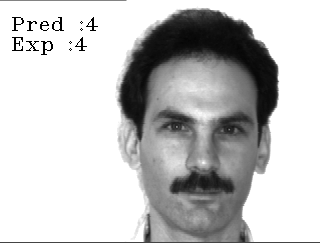

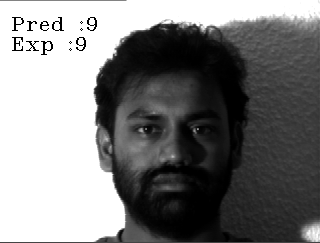

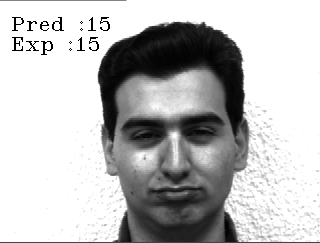

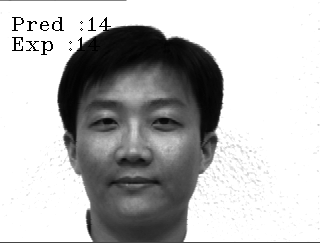

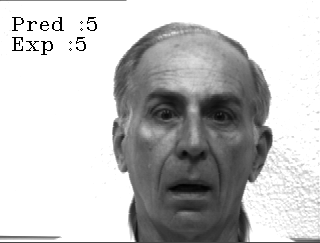

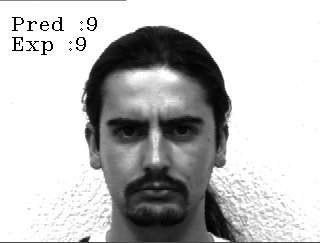

In [ ]:
test_paths = [os.path.join("/content/yalefaces/test", f)  for f in os.listdir("/content/yalefaces/test")]
predictions = []
expected_outputs = []

for path in test_paths:
  i = 0
  test_image = Image.open(path).convert("L")
  test_image_np = np.array(test_image, "uint8")
  expected_output = int(os.path.split(path)[1].split('.')[0].replace('subject', ''))
  expected_outputs.append(expected_output)
  prediction = lbph_face_classifier.predict(test_image_np)
  predictions.append(prediction[0])
  cv2.putText(test_image_np, "Pred :" + str(prediction[0]), (10, 30), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0, 0, 0))
  cv2.putText(test_image_np, "Exp :" + str(prediction[0]), (10, 50), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0, 0, 0))
  cv2_imshow(test_image_np) 

In [ ]:
count = 0
for i in range(0, len(predictions)):
  if expected_outputs[i] == predictions[i]:
    count += 1
accuracy = count/len(predictions)
accuracy

0.6666666666666666

In [ ]:
len(predictions)

30

# Using hyperparameters

In [ ]:
lbph_classifier = cv2.face.LBPHFaceRecognizer_create(radius = 4, neighbors = 12, grid_x = 9, grid_y = 9)
lbph_classifier.train(faces, ids)
lbph_classifier.write("lbph.yml")    

In [ ]:
lbph_face_classifier = cv2.face.LBPHFaceRecognizer_create()
lbph_face_classifier.read("/content/lbph.yml")

In [ ]:
test_paths = [os.path.join("/content/yalefaces/test", f)  for f in os.listdir("/content/yalefaces/test")]
predictions = []
expected_outputs = []

for path in test_paths:
  i = 0
  test_image = Image.open(path).convert("L")
  test_image_np = np.array(test_image, "uint8")
  expected_output = int(os.path.split(path)[1].split('.')[0].replace('subject', ''))
  expected_outputs.append(expected_output)
  prediction = lbph_face_classifier.predict(test_image_np)
  predictions.append(prediction[0])
count = 0
for i in range(0, len(predictions)):
  if expected_outputs[i] == predictions[i]:
    count += 1
accuracy = count/len(predictions)
accuracy

0.7333333333333333

## DLIB

In [ ]:
 import dlib
 import cv2
 from google.colab.patches import cv2_imshow
 from google.colab import drive
 drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


For this we will need facial popints and facial descriptors in order to get the algorithm to recognise faces

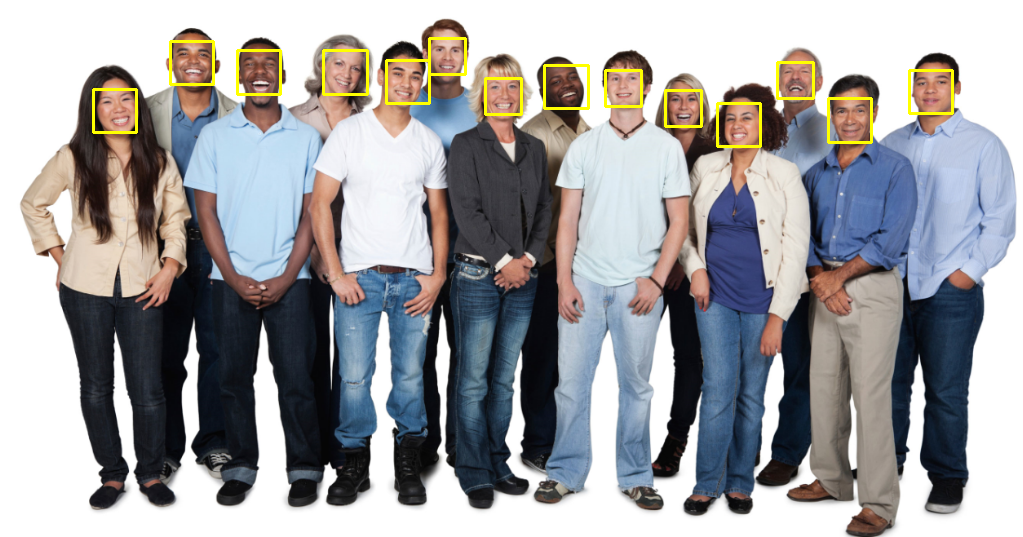

In [ ]:
face_detector = dlib.get_frontal_face_detector()
points_detector = dlib.shape_predictor("/content/drive/MyDrive/Data science/Computer Vision Masterclass/Weights/shape_predictor_68_face_landmarks.dat")
image = cv2.imread("/content/drive/MyDrive/Data science/Computer Vision Masterclass/Images/people2.jpg")
face_detection = face_detector(image, 1)
for face in face_detection:
  l, t, r, b = face.left(), face.top(), face.right(), face.bottom()
  cv2.rectangle(image, (l, t), (r, b), (0, 255, 255), 2)
cv2_imshow(image)

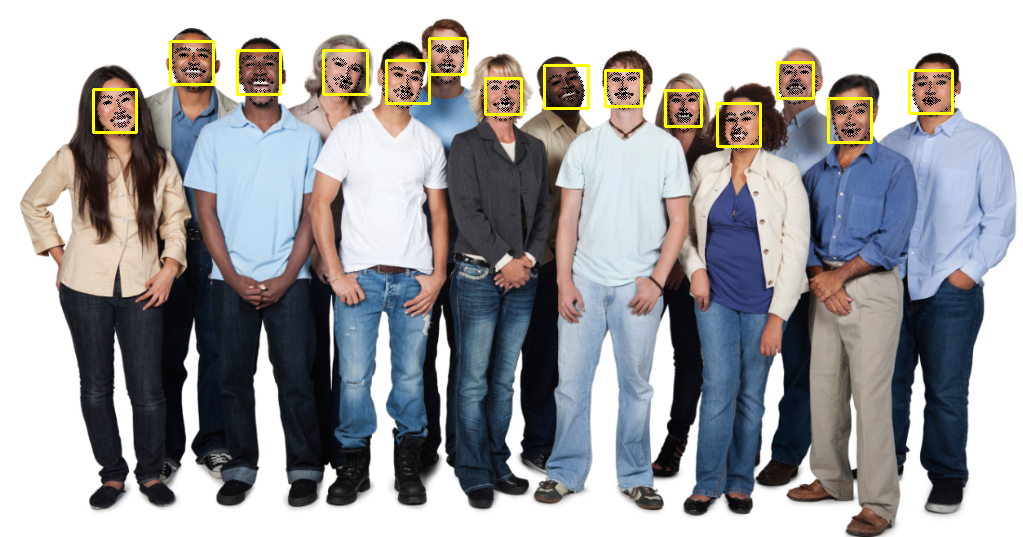

In [ ]:
face_detector = dlib.get_frontal_face_detector()
#facial points:
points_detector = dlib.shape_predictor("/content/drive/MyDrive/Data science/Computer Vision Masterclass/Weights/shape_predictor_68_face_landmarks.dat")
image = cv2.imread("/content/drive/MyDrive/Data science/Computer Vision Masterclass/Images/people2.jpg")
face_detection = face_detector(image, 1)
for face in face_detection:
  points = points_detector(image, face)
  for point in points.parts():
    cv2.circle(image, (point.x, point.y), 1, (0, 0, 0), 1)
  l, t, r, b = face.left(), face.top(), face.right(), face.bottom()
  cv2.rectangle(image, (l, t), (r, b), (0, 255, 255), 2)
cv2_imshow(image)

In [ ]:
import os

In [ ]:
face_detector = dlib.get_frontal_face_detector()
point_detector = dlib.shape_predictor("/content/drive/MyDrive/Data science/Computer Vision Masterclass/Weights/shape_predictor_68_face_landmarks.dat")
#importing the resnet model
face_descriptor_extractor = dlib.face_recognition_model_v1("/content/drive/MyDrive/Data science/Computer Vision Masterclass/Weights/dlib_face_recognition_resnet_model_v1.dat")


In [ ]:
index = {}
idx = 0
face_descriptors = None

paths = [os.path.join("/content/yalefaces/train", f) for f in os.listdir("/content/yalefaces/train")]
for path in paths:
  # print(path)
  image = Image.open(path).convert("RGB")
  image_np = np.array(image, 'uint8')
  face_detection = face_detector(image_np, 1)
  for face in face_detection:
    points = point_detector(image_np, face)
    for point in points.parts():
      cv2.circle(image_np, (point.x, point.y), 1, (0, 222, 120), 1)
    l, t, r, b = face.left(), face.top(), face.right(), face.bottom()
    cv2.rectangle(image_np, (l, t), (r, b), (0, 0, 0), 2)

    face_descriptor = face_descriptor_extractor.compute_face_descriptor(image_np, points)
    #print(type(face_descriptor))  #its type is a dlib.vector
    #print(len(face_descriptor))    #len will be 128 describing number of points detected
    #print(face_descriptor)
    
    #to put the face descriptors in a list:
    face_descriptor = [f for f in face_descriptor]
    #now to convert it into a numpy array:
    face_descriptor = np.asarray(face_descriptor, dtype = np.float64)
    #print(face_descriptor)
    #print(face_descriptor.shape)
    # in order to add new axis;
    face_descriptor = face_descriptor[np.newaxis, :]
    #print(face_descriptor)

    if face_descriptors is None:
      face_descriptors = face_descriptor
    else:
      face_descriptors = np.concatenate((face_descriptors, face_descriptor), axis = 0) # axis zero represents addition of rows

    index[idx] = path
    idx += 1
  # cv2_imshow(image_np)

In [ ]:
print(face_descriptors.shape)

(132, 128)


In [ ]:
# the higher the value, the lesser the similarity between faces
np.linalg.norm(face_descriptors[131] - face_descriptors[129])

# breakdown of above function:
def similarity(vec1, vec2):
  norm = 0
  norm = (sum(np.multiply((vec1 - vec2), (vec1 - vec2))))**(0.5)
  return norm

In [ ]:
# in order to find similarity between a face and the rest of the faces:
#np.linalg.norm(face_descriptors[131] - face_descriptors, axis = 1)

#now to get the most similar face;
#np.argmin(np.linalg.norm(face_descriptors[0] - face_descriptors, axis = 1)) # this code returns the index of most similar face

# to get next most similarface , lets exclude the 0 index:
np.argmin(np.linalg.norm(face_descriptors[0] - face_descriptors[1:], axis = 1)) # the correct index will be 1+ the output as 0th index was excluuded while counting

8

In [ ]:
index

{0: '/content/yalefaces/train/subject09.leftlight.gif',
 1: '/content/yalefaces/train/subject08.noglasses.gif',
 2: '/content/yalefaces/train/subject08.sad.gif',
 3: '/content/yalefaces/train/subject09.happy.gif',
 4: '/content/yalefaces/train/subject08.centerlight.gif',
 5: '/content/yalefaces/train/subject10.wink.gif',
 6: '/content/yalefaces/train/subject02.glasses.gif',
 7: '/content/yalefaces/train/subject09.noglasses.gif',
 8: '/content/yalefaces/train/subject07.surprised.gif',
 9: '/content/yalefaces/train/subject09.centerlight.gif',
 10: '/content/yalefaces/train/subject14.surprised.gif',
 11: '/content/yalefaces/train/subject05.glasses.gif',
 12: '/content/yalefaces/train/subject05.happy.gif',
 13: '/content/yalefaces/train/subject08.wink.gif',
 14: '/content/yalefaces/train/subject12.surprised.gif',
 15: '/content/yalefaces/train/subject01.glasses.gif',
 16: '/content/yalefaces/train/subject05.normal.gif',
 17: '/content/yalefaces/train/subject11.surprised.gif',
 18: '/conten

## Detecting Faces Using DLIB

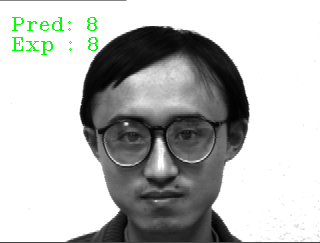

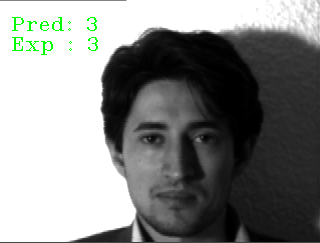

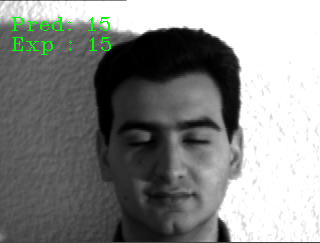

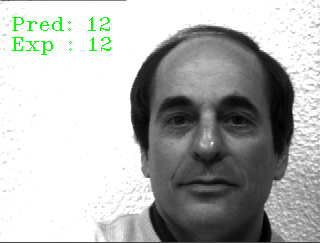

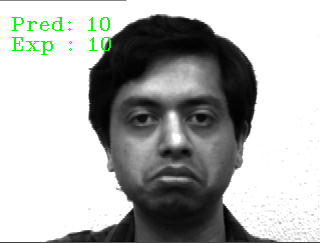

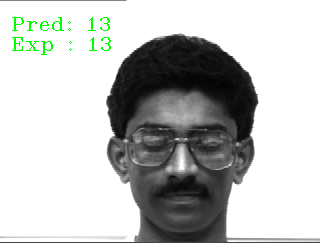

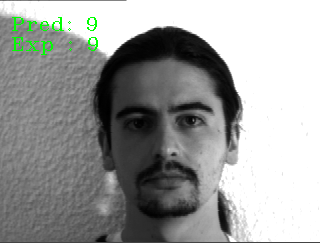

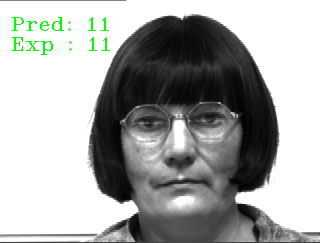

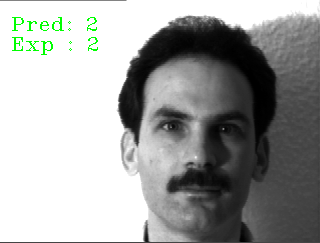

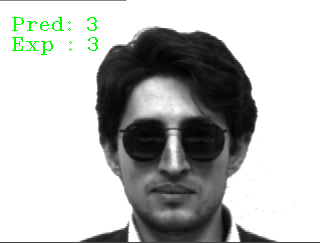

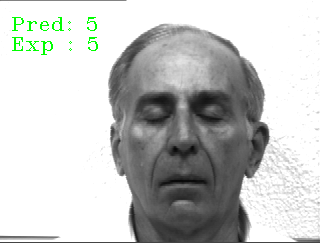

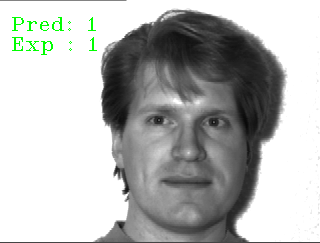

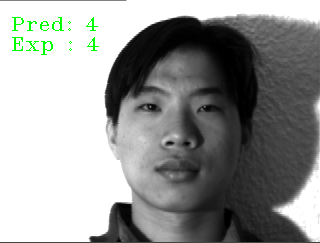

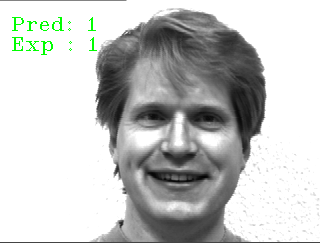

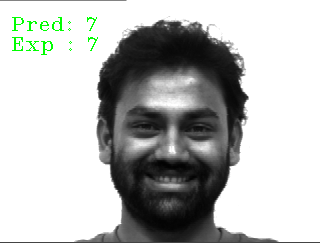

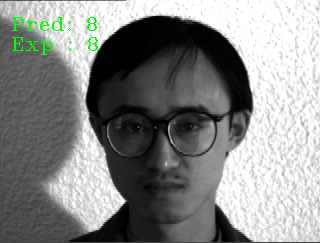

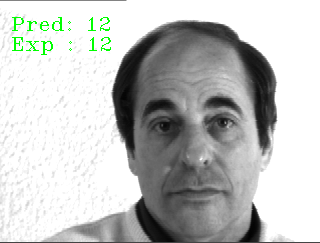

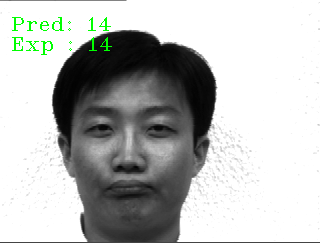

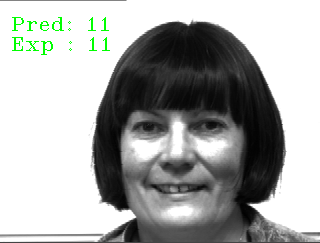

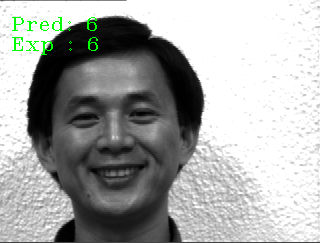

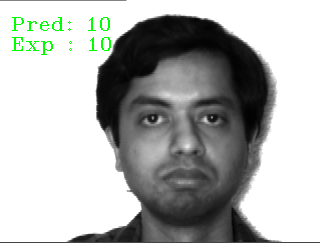

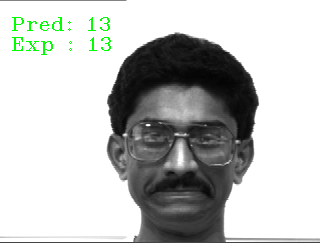

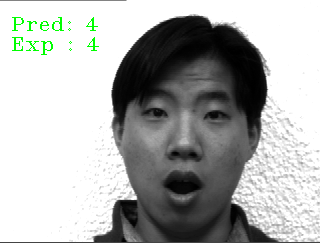

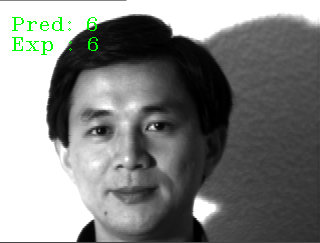

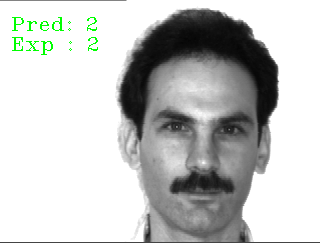

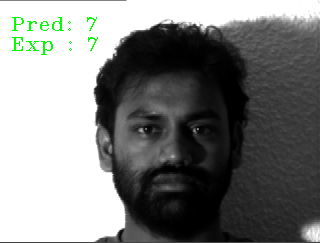

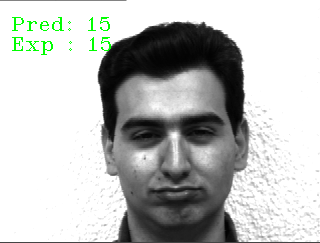

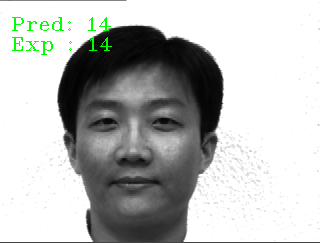

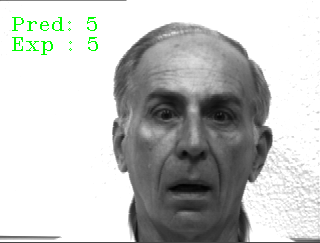

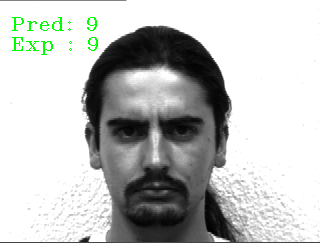

In [ ]:
threshold = 0.5
predictions = []
expected_outputs = []
paths = [os.path.join('/content/yalefaces/test', f) for f in os.listdir('/content/yalefaces/test')]
for path in paths:
  image = Image.open(path).convert("RGB")
  image_np = np.asarray(image, dtype = "uint8")
  face_detection = face_detector(image_np, 1) # 1 describes the sacle of image

  for face in face_detection:
    points = points_detector(image_np, face)
    face_descriptor = face_descriptor_extractor.compute_face_descriptor(image_np, points)
    face_descriptor = [f for f in face_descriptor]
    face_descriptor = np.asarray(face_descriptor, dtype = np.float64)
    face_descriptor = face_descriptor[np.newaxis, :]
    #to get the similarity
    distances = np.linalg.norm(face_descriptor - face_descriptors, axis = 1)
    min_index = np.argmin(distances)
    min_distance = distances[min_index]

    if min_distance <= threshold:
      name_pred = int(os.path.split(index[min_index])[1].split('.')[0].replace('subject', ''))
    else:
      name_pred = "NOT_IDENTIFIED"
    name_real = int(os.path.split(path)[1].split('.')[0].replace('subject', ''))

    predictions.append(name_pred)
    expected_outputs.append(name_real)

    cv2.putText(image_np, 'Pred: ' + str(name_pred), (10, 30), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0,255,0))
    cv2.putText(image_np, 'Exp : ' + str(name_real), (10, 50), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0,255,0))

  cv2_imshow(image_np)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(predictions, expected_outputs)

1.0